# Dodecahedron sampler
---

For reference:
- Dodecahedrons is composed of 20 polyhedron vertices, 30 polyhedron edges, and 12 pentagonal faces
 - Northern hemisphere has 6 faces with the first face centred on the polar north, and 5 faces on the same latitude
 - Sorthern hemisphere has 6 faces with the last face centred on the polar south, and 5 faces on the same latitude
- Geometric properties:
 - All vertices lie on the sphere
 - The centres of all faces lie on 1 of 4 latitudes
   - Face 0 (top face) lie on $y$
   - Faces 1-5 lie on $y'$
   - Faces 6-10 lie on $y'' = -y'$
   - Face 11 lie on $y''' = -y$
 - Length of an edge of a face in a unit dodecahedron is $a=\frac{R(\sqrt{5}–1)}{\sqrt{3}}$ ([source](https://math.stackexchange.com/questions/753038/edge-length-of-a-dodecahedron))
- We treat each pentagon as composed of 5 triangles with 2 adjacent vertices as base, and the centre of the face as top
- We can simplify by treating the net in 2 parts
 - Apply projection function to top half
 - Rotate sphere 180 degrees along x
 - Rotate 360 / 10 (half a face) along y
 - Apply projection function to bottom half
 - Stitch bottom to top (optional)



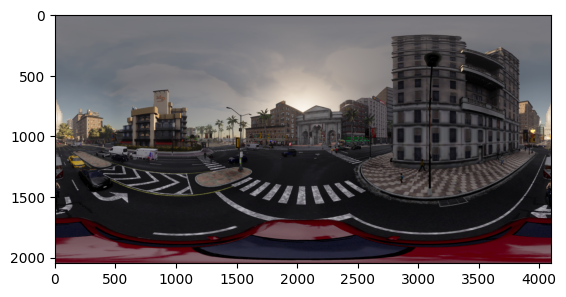

In [ ]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np

image = cv2.imread('/content/icosahedral_sampler/assets/0.png')

plt.imshow(image[:,:,::-1])

## Unwrap dodecahedron
---

Vertices:  (20, 3)
Faces:     (12, 5)


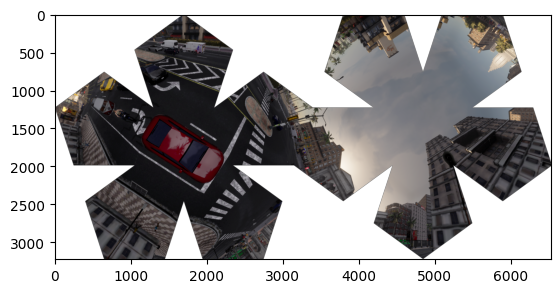

In [ ]:
from sphere2poly_sampler.poly_sampler import DodecahedralSampler

dode_sampler = DodecahedralSampler(resolution=800)
print("Vertices: ", dode_sampler.vertices.shape)
print("Faces:    ", dode_sampler.faces.shape)

dode_image = dode_sampler.unwrap(image,1)

plt.imsave(f"/content/icosahedral_sampler/assets/test_output.png",dode_image)
plt.imshow(dode_image)

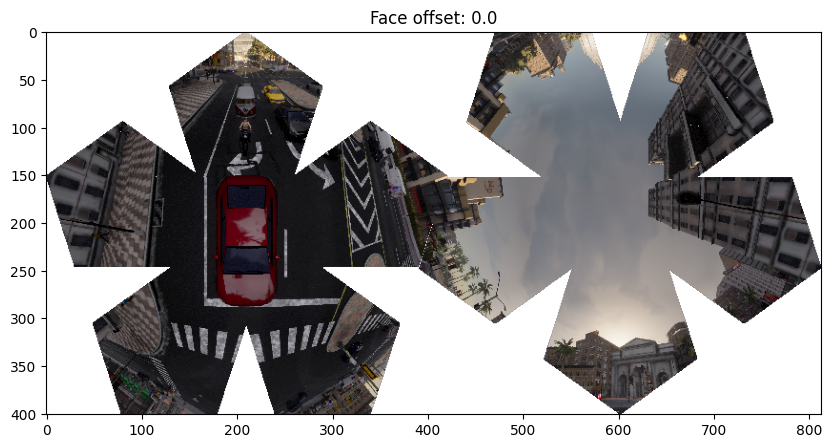

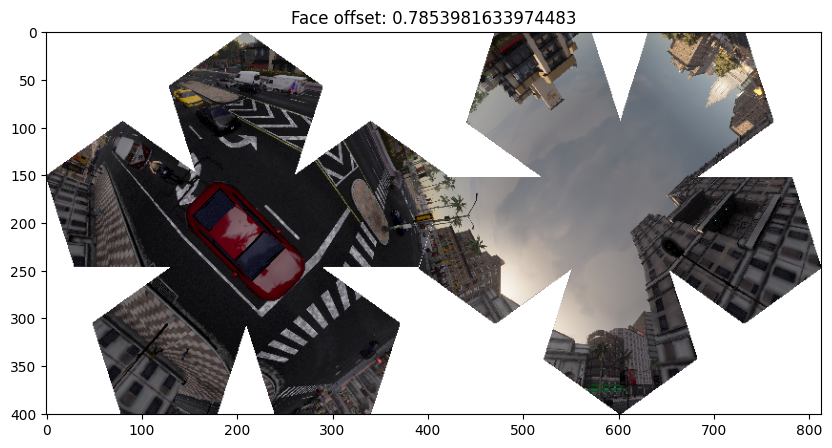

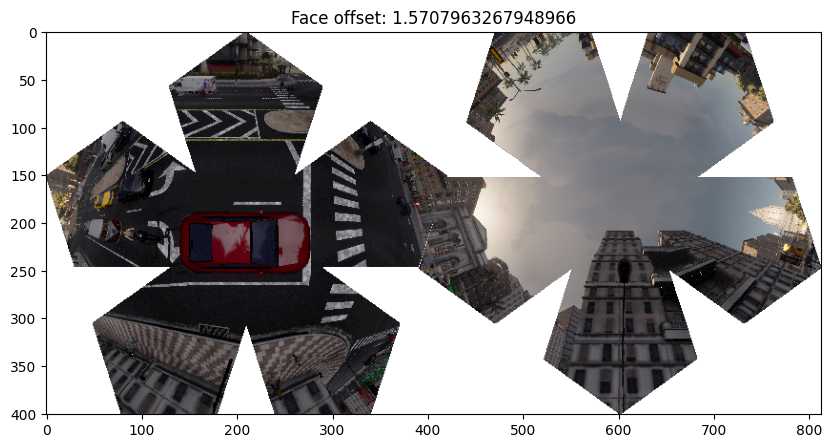

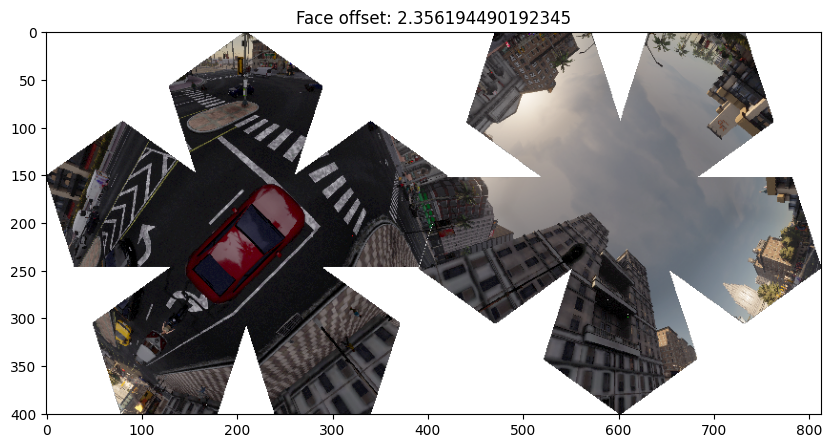

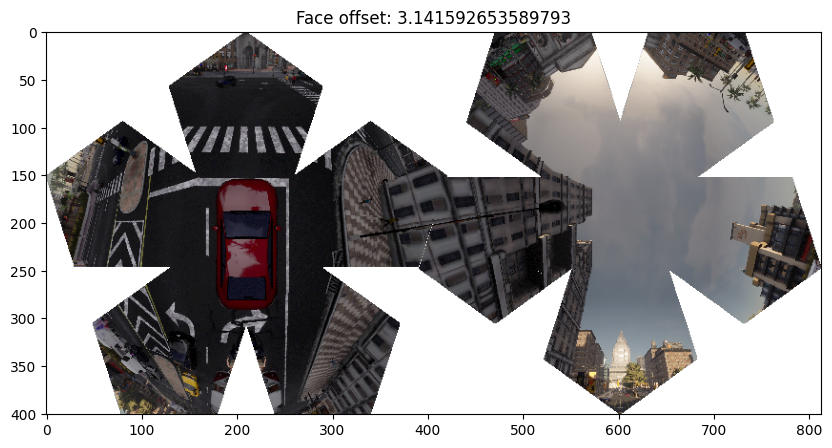

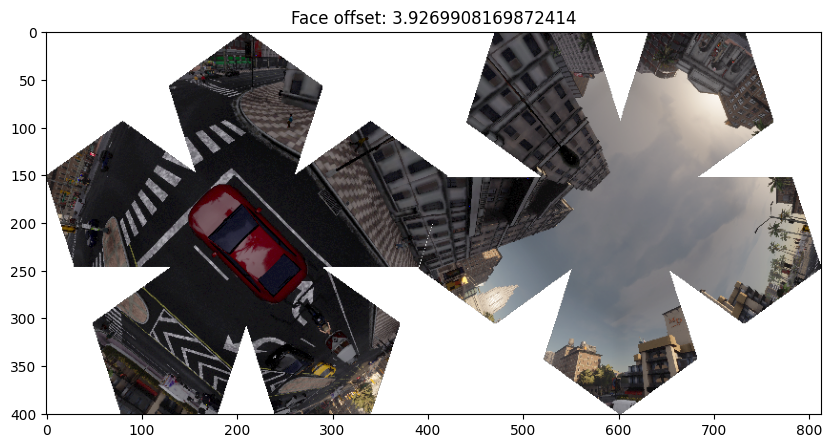

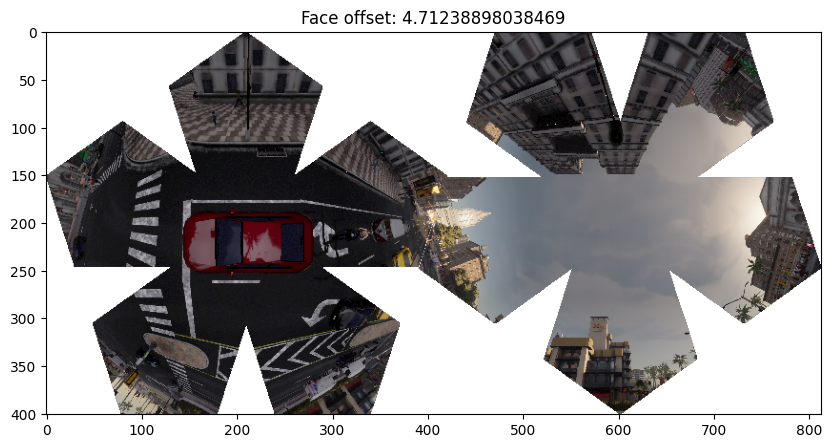

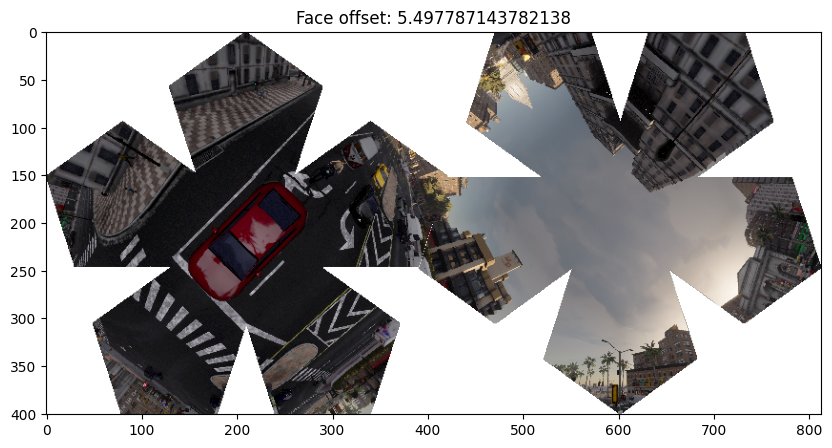

In [4]:
# face offset by 1/4*pi of a turn
# suggest to do this at lower resolution

dode_sampler = DodecahedralSampler(resolution=100)
for i in range(8):
    offset = 2*np.pi / len(range(8)) * i
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    offset_image = dode_sampler.unwrap(image, offset)
    ax.imshow(offset_image)
    ax.set_title(f"Face offset: {offset}")

## Face image
---

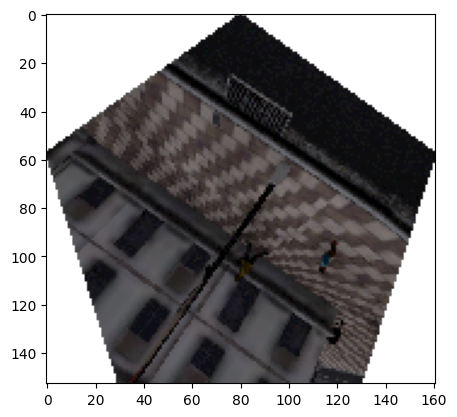

In [5]:
# get face projection from the equirectangular image
# faces in range [0, 12]
face_image = dode_sampler.get_face_image(face_no=1, eq_image=image, rotation_offset=1)
plt.imshow(face_image)

## Face colors
---

In [6]:
face_rgb = dode_sampler.get_face_rgb(face_no=10, eq_image=image)

face_rgb.shape

(17255, 3)